# 📊 E-commerce Product Data Analysis Project

Welcome! This notebook guides you through a complete data analysis process for an e-commerce product dataset. We'll begin by preparing and understanding the data, then proceed with exploratory data analysis (EDA), and finally answer key business questions.


## 🗂️ Table of Cotenets

[**1.- Data Preparing and Understandign**](#Data_Preparation_and_Understanding)
- [Load a CSV](#Load_a_CSV)
- [General Overview of the Dataset](#General_Overview_of_the_Dataset)
- [Changing Data Types of Columns](#Changing_Data_Types_of_Columns)
- [Missing Values](#Missing_Values)
- [Duplicates](#Duplicates)

[**2.- Exploratory Data Analysis**](#Exploratory_Data_Analysis)
- [Descriptive Statistics](#Descriptive_Statistics)
- [Scatter Plot: Current Price vs Rating](#Scatter_Plot:_Current_Price_vs_Rating)
- [Histogram of Current Price](#Histogram_of_Current_Price)
- [Average Rating by Category](#Average_Rating_by_Category)
- [Number of People Who Voted by Category](#Number_of_People_Who_Voted_by_Category)
- [Distribution of Discounts by Price Range](#Distribution_of_Discounts_by_Price_Range)
- [Average Discount Percentage by Category](#Average_Discount_Percentage_by_Category)
- [Most Popular Product](#Most_Popular_Product)
- [Most Popular Product Keywords](#Most_Popular_Product_Keywords)
- [Products With More Reviews](#Products_With_More_Reviews)
- [Heatmap of All Variables](#Heatmap_of_All_Variables)

<a id="Data_Preparation_and_Understanding"></a>
## 🧹 1. Data Preparation and Understanding 

In this section, we load the dataset and perform initial checks to ensure the data is ready for analysis.


<a id="Load_a_CSV"></a>
### 📁 Load a CSV
We import the dataset using `pandas` to begin the data processing.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Dataset_Ecommerce.csv")
pd.set_option('display.max_columns', None) 
df = df.drop(['img_link', 'product_link'], axis=1)

<a id="General_Overview_of_the_Dataset"></a>
### 👀 General Overview of the Dataset
We'll examine the shape, structure, and types of data to understand the basic composition of the dataset.


In [152]:
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...


In [153]:
# Number of rows and columns
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 14.


In [154]:
print(f"**We will examine the columns and their data types using the detailed information function.**")
print(f" ")
df.info()

**We will examine the columns and their data types using the detailed information function.**
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
dtypes: objec

<a id="Changing_Data_Types_of_Columns"></a>
### 📄 Changing Data Types of Columns 

In [156]:
# Finding unusual string in rating column
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [157]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


In [158]:
df = df.query('rating != "|"')

In [159]:
df['discounted_price'] = df['discounted_price'].str.replace("[₹,]", "", regex=True).astype('float64')
df['actual_price'] = df['actual_price'].str.replace("[₹,]", "", regex=True).astype('float64')
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64') / 100
df['rating'] = df['rating'].astype('float64')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

<a id="Missing_Values"></a>
### 🧩 Missing Values
Identify and quantify any missing values that could affect analysis.

In [161]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

In [162]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...


In [163]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [164]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

<a id="Duplicates"></a>
### 📄 Duplicates
Check for and remove duplicate rows that may skew results.

In [166]:
df.duplicated().any()

True

In [167]:
df = df.drop_duplicates(subset='product_id', keep='first')

In [168]:
df.shape

(1350, 14)

<a id="Exploratory_Data_Analysis"></a>
## 📈 2. Exploratory Data Analysis (EDA)

This section focuses on exploring and visualizing the data to uncover patterns, trends, and insights.


<a id="Descriptive_Statistics"></a>
### 📊 Descriptive Statistics
Generate summary statistics such as mean, median, and standard deviation for numerical columns.


In [171]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,3305.694941,5693.541200,0.467081,4.091852,17638.362222
std,7176.558813,11222.486817,0.216245,0.297444,42130.315626
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,349.000000,899.000000,0.310000,3.900000,1110.500000
50%,896.000000,1792.500000,0.490000,4.100000,4742.000000
75%,2176.500000,4582.500000,0.620000,4.300000,16007.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


<a id="Scatter_Plot:_Current_Price_vs_Rating"></a>
### 🔁 Scatter Plot: Current Price vs Rating
Visualize the relationship between a product’s current price and its user rating


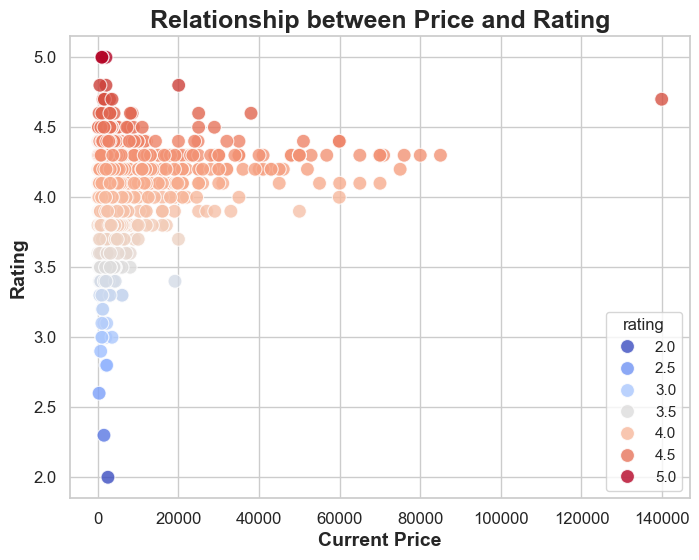

In [173]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x="actual_price", y="rating", data=df, 
                hue="rating", palette="coolwarm", 
                alpha=0.8, s=100)

plt.xlabel("Current Price", fontsize=14, fontweight="bold")
plt.ylabel("Rating", fontsize=14, fontweight="bold")
plt.title("Relationship between Price and Rating", fontsize=18, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<a id="Histogram_of_Current_Price"></a>
### 📉 Histogram of Current Price
Understand the distribution of product prices across the dataset.

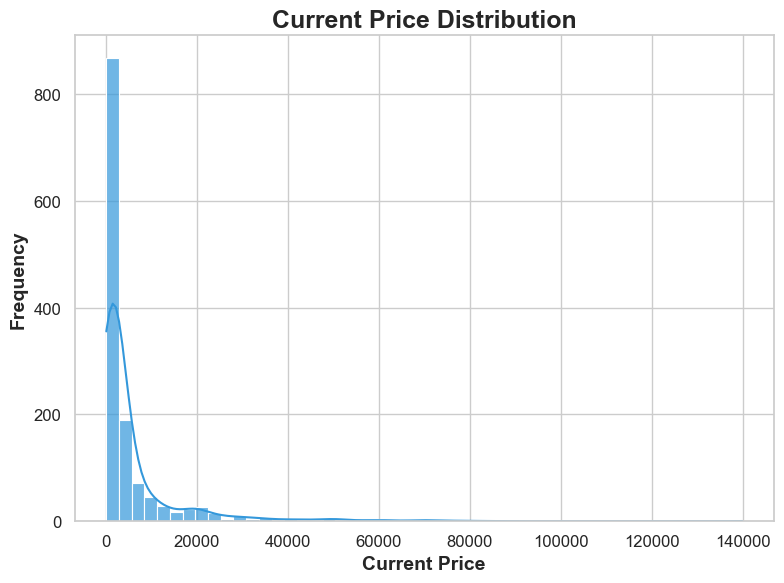

In [175]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(df['actual_price'], 
             bins=50, 
             kde=True, 
             color="#3498db", 
             alpha=0.7)

plt.xlabel("Current Price", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.title("Current Price Distribution", fontsize=18, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<a id="Average_Rating_by_Category"></a>
### 📦 Average Rating by Category

In [177]:
average_ratings = df.groupby("category")["rating"].mean().reset_index()
average_ratings = average_ratings.rename(columns={"rating": "Average_Rating"})
average_ratings = average_ratings.sort_values(by="Average_Rating", ascending=False)

print(average_ratings)

                                              category  Average_Rating
57                       Computers&Accessories|Tablets             4.6
48   Computers&Accessories|NetworkingDevices|Networ...             4.5
62    Electronics|Cameras&Photography|Accessories|Film             4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...             4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...             4.5
..                                                 ...             ...
3    Computers&Accessories|Accessories&Peripherals|...             3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...             3.5
2    Computers&Accessories|Accessories&Peripherals|...             3.5
14   Computers&Accessories|Accessories&Peripherals|...             3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...             3.3

[211 rows x 2 columns]


<a id="Number_of_People_Who_Voted_by_Category"></a>
### 📦 Number of People Who Voted by Category

In [179]:
sum_ratings = df.groupby("category")["rating_count"].sum().reset_index()
sum_ratings = sum_ratings.rename(columns={"rating_count": "Sum_Rating"})
sum_ratings = sum_ratings.sort_values(by="Sum_Rating", ascending=False)

top_5 = sum_ratings.head(5)
print(top_5)

                                              category  Sum_Rating
76   Electronics|Headphones,Earbuds&Accessories|Hea...   4012352.0
117  Electronics|Mobiles&Accessories|Smartphones&Ba...   2493269.0
10   Computers&Accessories|Accessories&Peripherals|...   2232029.0
89   Electronics|HomeTheater,TV&Video|Accessories|C...   1455967.0
119        Electronics|WearableTechnology|SmartWatches   1227958.0


<a id="Distribution_of_Discounts_by_Price_Range"></a>
### 📈Distribution of Discounts by Price Range

C:\Users\armad\AppData\Local\Temp\ipykernel_16884\2308777591.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_discounts = df.groupby('price_range')['discount_percentage'].mean().reset_index()
C:\Users\armad\AppData\Local\Temp\ipykernel_16884\2308777591.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='discount_percentage', data=avg_discounts, palette='Blues_d')


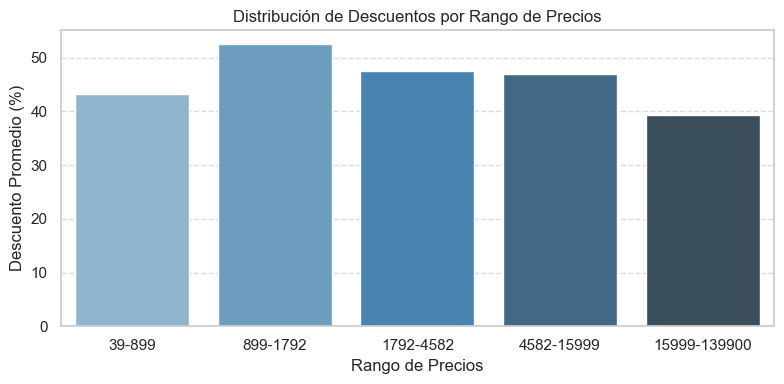

In [181]:

# Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Define price ranges dynamically
price_ranges = np.percentile(df['actual_price'], [0, 25, 50, 75, 90, 100])
price_labels = [f'{price_ranges[i]:.0f}-{price_ranges[i+1]:.0f}' for i in range(len(price_ranges)-1)]

# Create a new column for price ranges
df['price_range'] = pd.cut(df['actual_price'], bins=price_ranges, labels=price_labels)

# Calculate average discount percentage for each price range
avg_discounts = df.groupby('price_range')['discount_percentage'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='price_range', y='discount_percentage', data=avg_discounts, palette='Blues_d')

# Add title and labels
plt.title('Distribución de Descuentos por Rango de Precios')
plt.xlabel('Rango de Precios')
plt.ylabel('Descuento Promedio (%)')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [203]:
df = df.drop(['price_range'], axis=1)

<a id="Average_Discount_Percentage_by_Category"></a>
### 📊 Average Discount Percentage by Category

In [205]:
average_DP = df.groupby("category")["discount_percentage"].mean().reset_index()
average_DP = average_DP.rename(columns={"discount_percentage": "Average_Discount_Percentage"})
average_DP = average_DP.sort_values(by="Average_Discount_Percentage", ascending=False)

print(average_DP)

                                              category  \
106  Electronics|Mobiles&Accessories|MobileAccessor...   
75   Electronics|Headphones,Earbuds&Accessories|Ear...   
6    Computers&Accessories|Accessories&Peripherals|...   
73   Electronics|Headphones,Earbuds&Accessories|Ada...   
14   Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
121  Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
81   Electronics|HomeAudio|MediaStreamingDevices|St...   
62    Electronics|Cameras&Photography|Accessories|Film   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

     Average_Discount_Percentage  
106                    90.090090  
75                     90.090090  
6                      90.090090  
73                     87.987988  
14                     87.722505  
..                           ...  
206                     0.000000  
121                    

<a id="Most_Popular_Product"></a>
### 📊 Most Popular Product

In [207]:
# Count occurrences of product names
product_counts = df["product_id"].value_counts()

# Sort in descending order and display top results
print(product_counts.sort_values(ascending=False).head(1))                                               

product_id
B07JW9H4J1    1
Name: count, dtype: int64


In [209]:
fila_especifica = df.loc[df['product_id'] == 'B07JW9H4J1']
fila_especifica

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...


<a id="Most_Popular_Product_Keywords"></a>
### 📊 Most Popular Product Keywords

In [211]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [213]:
textos = df['product_name'].str.lower()

stop_words = set(stopwords.words('english'))  
palabras = []
for texto in textos:
    tokens = word_tokenize(texto)
    tokens = [palabra for palabra in tokens if palabra.isalpha() and palabra not in stop_words]
    palabras.extend(tokens)

frecuencia = Counter(palabras)

top_5 = frecuencia.most_common(5)
print(top_5)

[('black', 447), ('usb', 312), ('cable', 300), ('charging', 174), ('smart', 159)]


<a id="Products_With_More_Reviews"></a>
### 📦 Products With More Reviews

In [215]:
sum_product_id = df.groupby("product_id")["rating_count"].sum().reset_index()
sum_product_id = sum_product_id.rename(columns={"rating_count": "Sum_product_id"})
sum_product_id = sum_product_id.sort_values(by="Sum_product_id", ascending=False)

top_2 = sum_product_id.head(2)
print(top_2)

     product_id  Sum_product_id
356  B07KSMBL2H        426973.0
137  B014I8SSD0        426973.0


In [217]:
p_more_reviews = df.loc[df['product_id'].isin(['B07KSMBL2H', 'B014I8SSD0'])]
p_more_reviews

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,68.714286,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,34.947368,4.4,426973.0,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...


<a id="Heatmap_of_All_Variables"></a>
### 🔥 Heatmap of All Variables
Explore the correlation matrix using a heatmap to identify variable relationships.


In [219]:
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

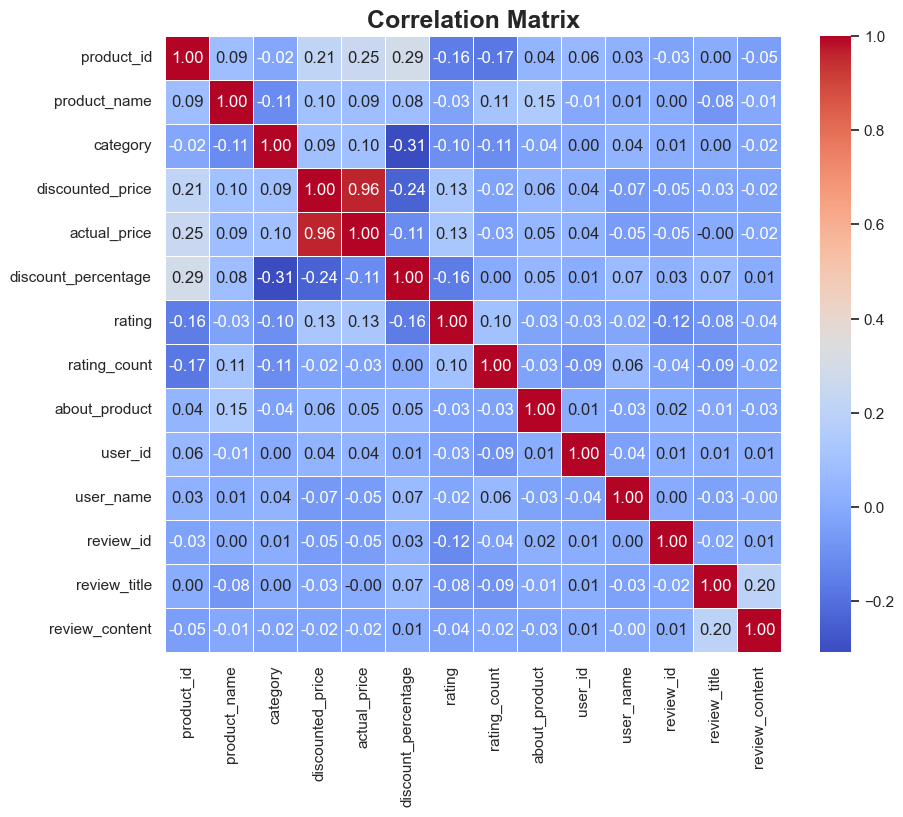

In [221]:
# Create the correlation matrix
correlation_matrix = df.corr()

# Set the figure size and style
plt.figure(figsize=(10, 8))
sns.set(style="white")  # White background

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Display correlation values
            cmap="coolwarm",  # Color palette
            square=True,  # Ensure cells are square
            fmt=".2f",  # Format correlation values with 2 decimals
            linewidths=0.5)  # Add lines between cells

# Set the title
plt.title("Correlation Matrix", fontsize=18, fontweight="bold")

# Show the plot
plt.show()